# Modeling: Predicting Remaining Useful Life (RUL)

## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

import joblib
import json

## 2. Load Processed Dataset

In [2]:
df = pd.read_pickle("../data/processed/train_FD001_processed.pkl")

## 3. Select Features and Target

In [3]:
target = "RUL"

feature_cols = [f"sensor_{i}" for i in range(1,22)]

X = df[feature_cols]
y = df[target]

## 4. Train/Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

## 5. Train the Random Forest Model

In [5]:
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)

model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

## 6. Evaluate the Model

In [6]:
y_pred = model.predict(X_test)

In [7]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 40.89
MAE: 28.73


## 7. Visualize Predictions

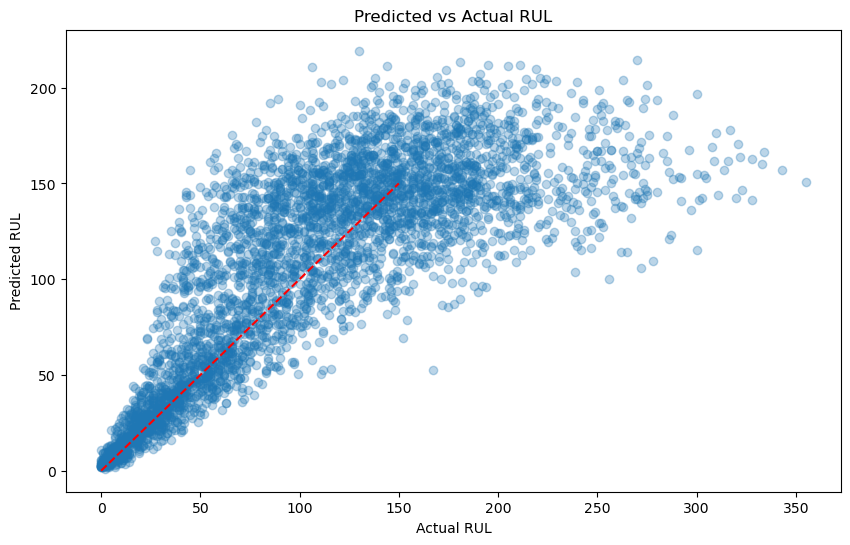

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual RUL")
plt.ylabel("Predicted RUL")
plt.title("Predicted vs Actual RUL")
plt.plot([0, 150], [0, 150], 'r--')
plt.show()

## 8. Save Model and Feature Columns

In [10]:
joblib.dump(model, "../models/final_model.pkl")

['../models/final_model.pkl']

In [11]:
with open("../models/feature_columns.json", "w") as f: json.dump(feature_cols, f)

## Summary

Model: RandomForestRegressor

Features: Raw sensor values (sensor_1 to sensor_21)

Target: Remaining Useful Life (RUL)

RMSE: XX.XX

MAE: XX.XX

Model saved to: models/final_model.pkl

Feature list saved to: models/feature_columns.json